In [29]:
# Cell 1: Imports and global plotting/style configuration

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings

# Suppress non-critical warnings to keep notebook output clean
warnings.simplefilter("ignore")

# Use a clean, readable style for all seaborn/matplotlib plots
sns.set_style("whitegrid")


In [30]:
# Cell 2: Load the raw Indian liver dataset from CSV

liver_df = pd.read_csv("../Dataset/indian_liver_patient.csv")


print("Dataset loaded successfully. First 5 rows:")
display(liver_df.head())

print("\nInfo:")
print(liver_df.info())

print("\nMissing values per column:")
print(liver_df.isnull().sum())


Dataset loaded successfully. First 5 rows:


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB
None

Missing values per column:
Age                           0
Gender             

In [31]:
# Cell 3: Ensure we are working with a liver_df DataFrame
# (fallback to 'data' if notebook environment already used that name)

try:
    liver_df  # will raise NameError if not defined
except NameError:
    # If 'liver_df' is not defined, but 'data' exists from some earlier step:
    liver_df = data.copy()
    print("liver_df was not defined; copied from 'data'.")

print("\nPreview of liver_df:")
display(liver_df.head())



Preview of liver_df:


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [32]:
# Cell 4: Clean column names and handle missing values in key feature(s)

# Normalize column names: strip whitespace and replace spaces with underscores
liver_df.columns = [col.strip().replace(" ", "_") for col in liver_df.columns]

print("Renamed columns:")
print(liver_df.columns)

# If Albumin_and_Globulin_Ratio exists, fill missing values with the median
if "Albumin_and_Globulin_Ratio" in liver_df.columns:
    liver_df["Albumin_and_Globulin_Ratio"] = (
        liver_df["Albumin_and_Globulin_Ratio"]
        .fillna(liver_df["Albumin_and_Globulin_Ratio"].median())
    )

print("\nMissing values after cleaning/filling (if any):")
print(liver_df.isnull().sum())


Renamed columns:
Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

Missing values after cleaning/filling (if any):
Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64


In [33]:
# Cell 5: Encode categorical variables (Gender, target) into numeric form

# Encode Gender: Male -> 1, Female -> 0
if "Gender" in liver_df.columns:
    liver_df["Gender"] = liver_df["Gender"].map({"Male": 1, "Female": 0})
    print("Unique values in Gender after encoding:", liver_df["Gender"].unique())

# Encode Dataset column: 1 = liver disease, 2 = no disease
# Then rename 'Dataset' -> 'target' for clarity and consistency
if "Dataset" in liver_df.columns:
    liver_df["Dataset"] = liver_df["Dataset"].map({1: 1, 2: 0})
    liver_df.rename(columns={"Dataset": "target"}, inplace=True)

print("\nTarget value counts (1 = Disease, 0 = No Disease):")
print(liver_df["target"].value_counts())


Unique values in Gender after encoding: [0 1]

Target value counts (1 = Disease, 0 = No Disease):
target
1    416
0    167
Name: count, dtype: int64


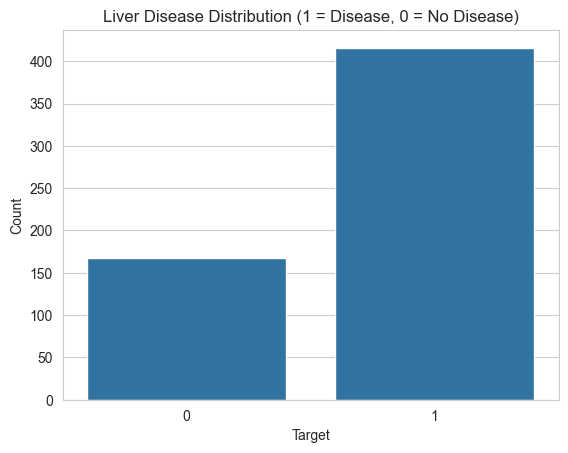

In [34]:
# Cell 6: Visualize class balance (disease vs no disease)

sns.countplot(x="target", data=liver_df)
plt.title("Liver Disease Distribution (1 = Disease, 0 = No Disease)")
plt.xlabel("Target")
plt.ylabel("Count")
plt.show()


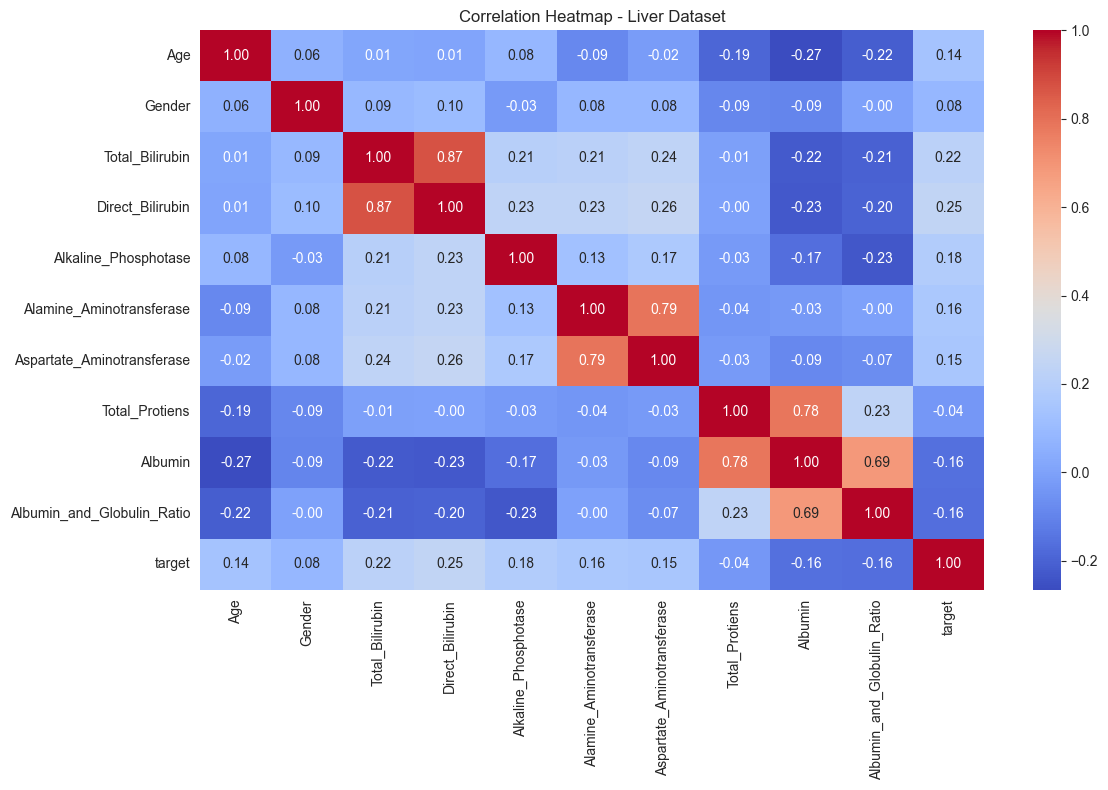

In [35]:
# Cell 7: Correlation heatmap of all numeric features + target

plt.figure(figsize=(12, 8))
sns.heatmap(liver_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap - Liver Dataset")
plt.tight_layout()
plt.show()


In [36]:
# Cell 8: Define features (X) and target (y), then create train/test split

from sklearn.model_selection import train_test_split

# Separate features and target
X_liver = liver_df.drop(columns="target")
y_liver = liver_df["target"]

print("Shape of X_liver:", X_liver.shape)
print("Shape of y_liver:", y_liver.shape)
print("\nFeature columns:")
print(list(X_liver.columns))

# Train-test split (stratified to preserve class balance)
X_liver_train, X_liver_test, y_liver_train, y_liver_test = train_test_split(
    X_liver,
    y_liver,
    test_size=0.2,
    random_state=42,
    stratify=y_liver
)

print("\nTrain/Test split done:")
print("X_liver_train:", X_liver_train.shape)
print("X_liver_test :", X_liver_test.shape)
print("y_liver_train:", y_liver_train.shape)
print("y_liver_test :", y_liver_test.shape)


Shape of X_liver: (583, 10)
Shape of y_liver: (583,)

Feature columns:
['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio']

Train/Test split done:
X_liver_train: (466, 10)
X_liver_test : (117, 10)
y_liver_train: (466,)
y_liver_test : (117,)


In [37]:
# Cell 9: Import classification models and evaluation metrics

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
)


In [38]:
# Cell 10 – Define base XGBoost model and hyperparameter search space (Liver dataset)

from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

# Base XGBoost classifier
xgb_base = XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",   # avoids deprecated warning
    use_label_encoder=False,
    random_state=42,
)

# Hyperparameter search space for XGBoost
xgb_param_dist = {
    "n_estimators":      [100, 200, 300, 400, 500],
    "max_depth":         [3, 4, 5, 6],
    "learning_rate":     [0.01, 0.03, 0.05, 0.1],
    "subsample":         [0.7, 0.8, 0.9, 1.0],
    "colsample_bytree":  [0.7, 0.8, 0.9, 1.0],
    "min_child_weight":  [1, 3, 5],
    "gamma":             [0.0, 0.1, 0.2],
    "reg_lambda":        [0.5, 1.0, 1.5],
}


In [39]:
# Cell 11 – Hyperparameter tuning for XGBoost on the liver dataset

xgb_search = RandomizedSearchCV(
    estimator=xgb_base,
    param_distributions=xgb_param_dist,
    n_iter=30,          # increase to 50–100 if you want even better tuning & have time
    scoring="f1",       # optimize for F1 (handles class imbalance better than accuracy)
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1,
)

xgb_search.fit(X_liver_train, y_liver_train)

print("Best XGBoost parameters:\n", xgb_search.best_params_)
print("\nBest cross-validated F1 score: ", xgb_search.best_score_)

# This is the tuned XGBoost model we’ll compare with the others
best_xgb_liver = xgb_search.best_estimator_


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best XGBoost parameters:
 {'subsample': 0.7, 'reg_lambda': 1.0, 'n_estimators': 200, 'min_child_weight': 5, 'max_depth': 6, 'learning_rate': 0.01, 'gamma': 0.1, 'colsample_bytree': 0.7}

Best cross-validated F1 score:  0.8314965653541504


In [40]:
# Cell 12 – Train & evaluate all liver models (using tuned XGBoost)

liver_models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost (tuned)": best_xgb_liver,
}

liver_results = []
liver_trained_models = {}

for name, model in liver_models.items():
    print(f"Training {name}...")
    model.fit(X_liver_train, y_liver_train)
    liver_trained_models[name] = model
    
    # Predictions on test set
    y_pred = model.predict(X_liver_test)
    
    # Metrics
    acc  = accuracy_score(y_liver_test, y_pred)
    prec = precision_score(y_liver_test, y_pred)
    rec  = recall_score(y_liver_test, y_pred)
    f1   = f1_score(y_liver_test, y_pred)
    
    # Train accuracy (for over/underfitting insight)
    train_acc = model.score(X_liver_train, y_liver_train)
    
    liver_results.append({
        "Model": name,
        "Train_Accuracy": train_acc,
        "Test_Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1_Score": f1
    })
    
    print(f"{name:18s} -> Train: {train_acc:.3f}, Test: {acc:.3f}, F1: {f1:.3f}")
    print("-" * 60)

print("Liver model training & evaluation completed.")


Training Logistic Regression...
Logistic Regression -> Train: 0.734, Test: 0.735, F1: 0.836
------------------------------------------------------------
Training SVM...
SVM                -> Train: 0.715, Test: 0.709, F1: 0.830
------------------------------------------------------------
Training KNN...
KNN                -> Train: 0.770, Test: 0.675, F1: 0.787
------------------------------------------------------------
Training Decision Tree...
Decision Tree      -> Train: 1.000, Test: 0.581, F1: 0.710
------------------------------------------------------------
Training Random Forest...
Random Forest      -> Train: 1.000, Test: 0.735, F1: 0.831
------------------------------------------------------------
Training Naive Bayes...
Naive Bayes        -> Train: 0.532, Test: 0.641, F1: 0.667
------------------------------------------------------------
Training Gradient Boosting...
Gradient Boosting  -> Train: 0.942, Test: 0.684, F1: 0.798
--------------------------------------------------

In [41]:
# Cell 13 – Collect liver model performance into a DataFrame

import pandas as pd

liver_results_df = pd.DataFrame(liver_results).set_index("Model")
print("Summary of liver model performance:")
display(liver_results_df)


Summary of liver model performance:


,Train_Accuracy,Test_Accuracy,Precision,Recall,F1_Score
Model,,,,,
Logistic Regression,0.733906,0.735043,0.745283,0.951807,0.835979
SVM,0.714592,0.709402,0.709402,1.000000,0.830000
KNN,0.770386,0.675214,0.736842,0.843373,0.786517
Decision Tree,1.000000,0.581197,0.697674,0.722892,0.710059
Random Forest,1.000000,0.735043,0.760000,0.915663,0.830601
Naive Bayes,0.532189,0.641026,0.976744,0.506024,0.666667
Gradient Boosting,0.942060,0.683761,0.730000,0.879518,0.797814
XGBoost (tuned),0.804721,0.700855,0.722222,0.939759,0.816754


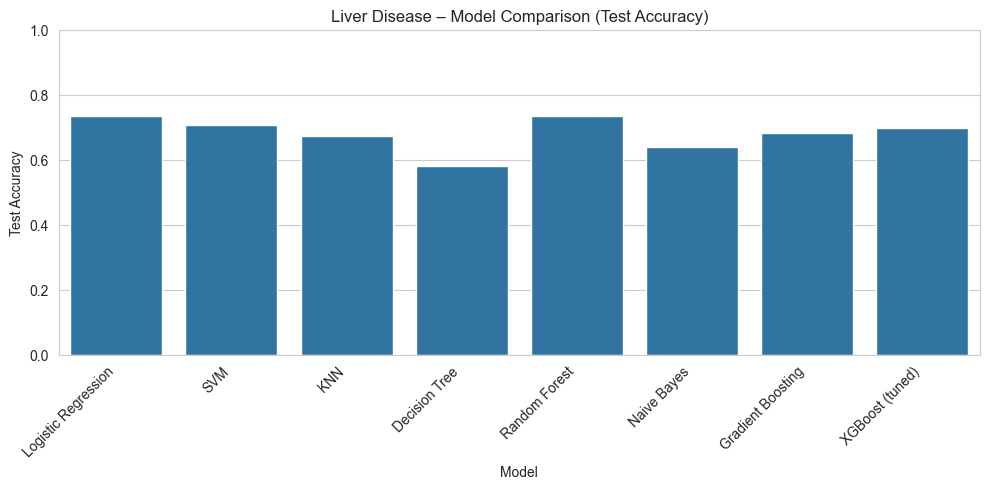

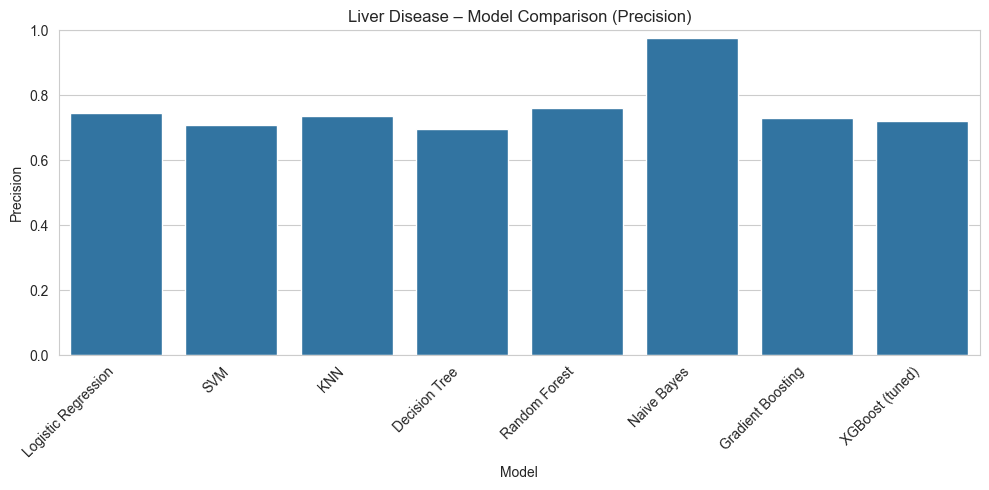

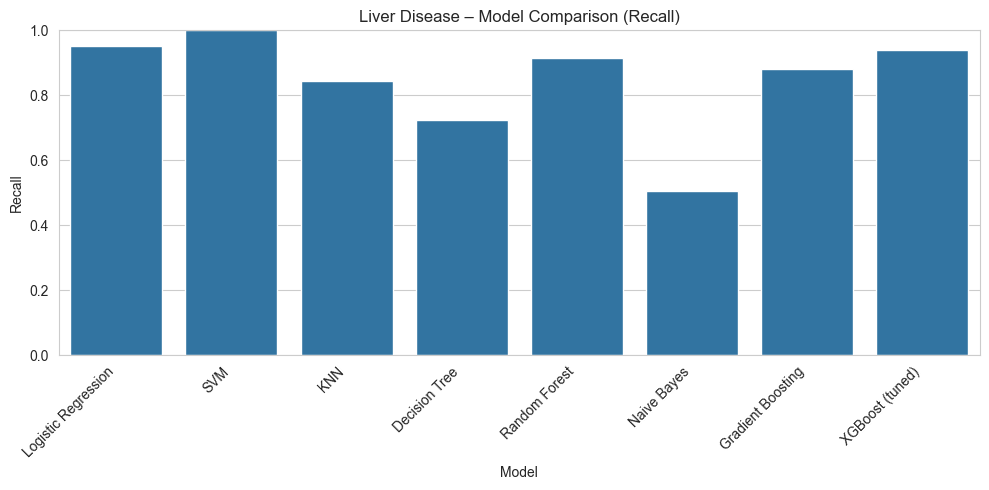

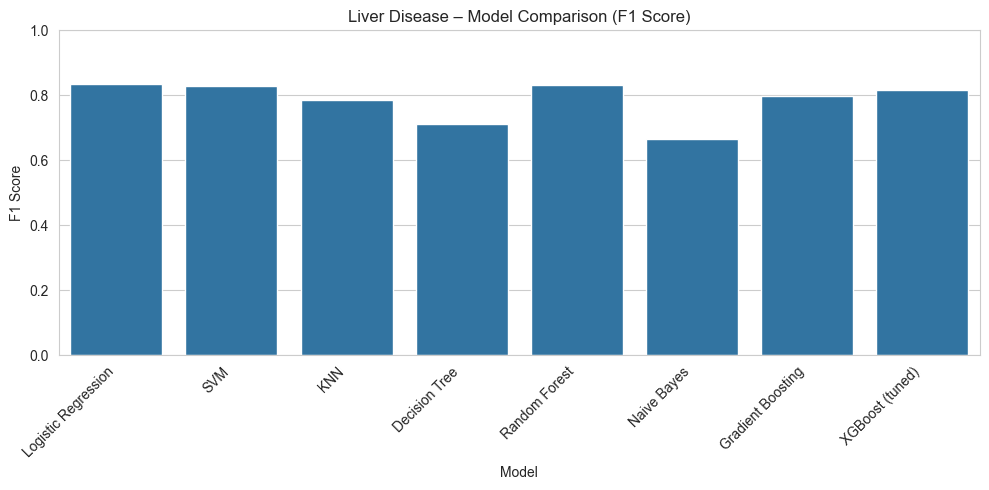

In [42]:
# Cell 14 – Bar plots comparing models on key metrics (Liver)

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

metrics_to_plot = ["Test_Accuracy", "Precision", "Recall", "F1_Score"]

for metric in metrics_to_plot:
    plt.figure(figsize=(10, 5))
    sns.barplot(
        x=liver_results_df.index,
        y=liver_results_df[metric].values
    )
    plt.xticks(rotation=45, ha="right")
    plt.ylim(0, 1)
    plt.ylabel(metric.replace("_", " "))
    plt.title(f"Liver Disease – Model Comparison ({metric.replace('_', ' ')})")
    plt.tight_layout()
    plt.show()


In [43]:
# Cell 15 – Train vs Test accuracy to inspect overfitting/underfitting (Liver)

print("Train vs Test Accuracy for each liver model:\n")

for model_name, row in liver_results_df.iterrows():
    train_acc = row["Train_Accuracy"]
    test_acc  = row["Test_Accuracy"]
    diff      = train_acc - test_acc
    print(f"{model_name:20s} -> Train: {train_acc:.3f}, Test: {test_acc:.3f}, Diff (Train - Test): {diff:.3f}")


Train vs Test Accuracy for each liver model:

Logistic Regression  -> Train: 0.734, Test: 0.735, Diff (Train - Test): -0.001
SVM                  -> Train: 0.715, Test: 0.709, Diff (Train - Test): 0.005
KNN                  -> Train: 0.770, Test: 0.675, Diff (Train - Test): 0.095
Decision Tree        -> Train: 1.000, Test: 0.581, Diff (Train - Test): 0.419
Random Forest        -> Train: 1.000, Test: 0.735, Diff (Train - Test): 0.265
Naive Bayes          -> Train: 0.532, Test: 0.641, Diff (Train - Test): -0.109
Gradient Boosting    -> Train: 0.942, Test: 0.684, Diff (Train - Test): 0.258
XGBoost (tuned)      -> Train: 0.805, Test: 0.701, Diff (Train - Test): 0.104


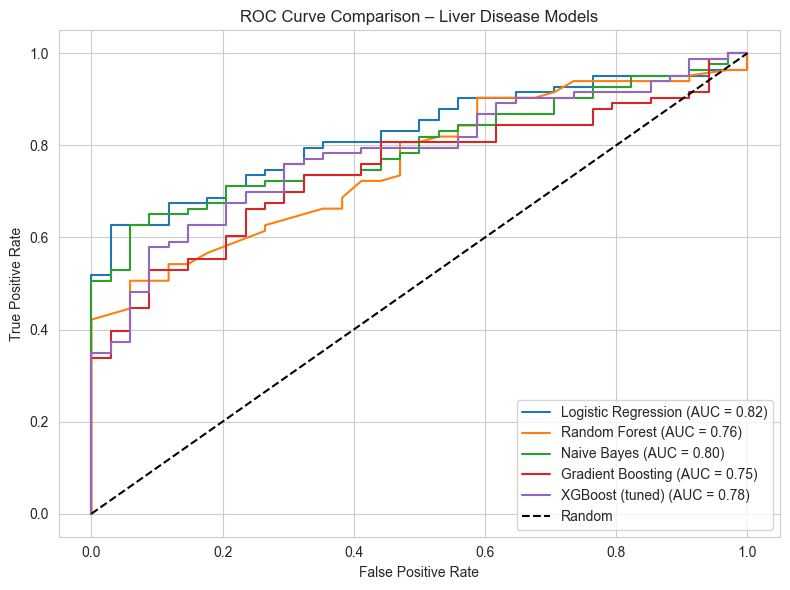

In [44]:
#cell 16 - ROC curve comparison for key liver models

from sklearn.metrics import roc_curve, roc_auc_score

plt.figure(figsize=(8, 6))

models_for_roc = ["Logistic Regression", "Random Forest", "Naive Bayes", "Gradient Boosting"]

# Include tuned XGBoost if available
if "XGBoost (tuned)" in liver_trained_models:
    models_for_roc.append("XGBoost (tuned)")

for name in models_for_roc:
    model = liver_trained_models[name]
    
    # Use predict_proba if available
    if hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(X_liver_test)[:, 1]
    # Fallback to decision_function (for some models)
    elif hasattr(model, "decision_function"):
        y_scores = model.decision_function(X_liver_test)
    else:
        print(f"Skipping {name}: no probability or decision_function.")
        continue
    
    fpr, tpr, _ = roc_curve(y_liver_test, y_scores)
    auc = roc_auc_score(y_liver_test, y_scores)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")

# Random baseline
plt.plot([0, 1], [0, 1], "k--", label="Random")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison – Liver Disease Models")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [45]:
#Cell 16 Pretty print of model results 
print("\n===== Liver Model Performance Summary =====\n")

for result in liver_results:
    name  = result["Model"]
    acc   = result["Test_Accuracy"]
    f1    = result["F1_Score"]

    print(f"Training {name}...")
    print(f"{name:20s} -> Test Accuracy: {acc*100:.2f}% | F1: {f1:.3f}")
    print("-" * 60)

print("Liver model training & evaluation completed.")



===== Liver Model Performance Summary =====

Training Logistic Regression...
Logistic Regression  -> Test Accuracy: 73.50% | F1: 0.836
------------------------------------------------------------
Training SVM...
SVM                  -> Test Accuracy: 70.94% | F1: 0.830
------------------------------------------------------------
Training KNN...
KNN                  -> Test Accuracy: 67.52% | F1: 0.787
------------------------------------------------------------
Training Decision Tree...
Decision Tree        -> Test Accuracy: 58.12% | F1: 0.710
------------------------------------------------------------
Training Random Forest...
Random Forest        -> Test Accuracy: 73.50% | F1: 0.831
------------------------------------------------------------
Training Naive Bayes...
Naive Bayes          -> Test Accuracy: 64.10% | F1: 0.667
------------------------------------------------------------
Training Gradient Boosting...
Gradient Boosting    -> Test Accuracy: 68.38% | F1: 0.798
------------

Best liver model (by Test Accuracy): Logistic Regression



<Figure size 500x500 with 0 Axes>

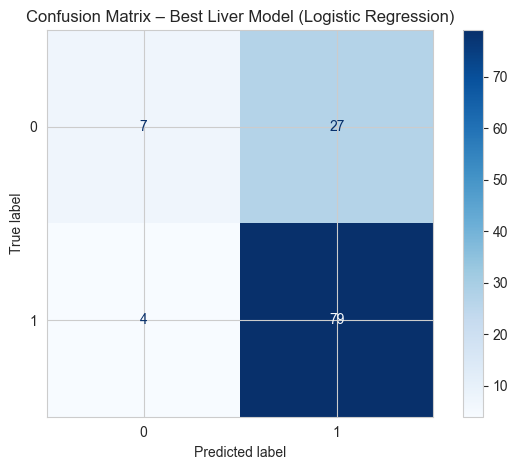

In [46]:
# Cell 17 – Confusion matrix for the best liver model (by Test Accuracy)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Pick the best model based on Test_Accuracy
best_liver_model_name = liver_results_df["Test_Accuracy"].idxmax()
best_liver_model = liver_trained_models[best_liver_model_name]

print(f"Best liver model (by Test Accuracy): {best_liver_model_name}\n")

y_best_pred = best_liver_model.predict(X_liver_test)

cm = confusion_matrix(y_liver_test, y_best_pred)

plt.figure(figsize=(5, 5))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap="Blues", values_format="d")
plt.title(f"Confusion Matrix – Best Liver Model ({best_liver_model_name})")
plt.tight_layout()
plt.show()


In [47]:
# Cell 18: Retrain best liver model on full dataset and save

import pickle

print(f"Retraining best liver model ({best_liver_model_name}) on full dataset...")

best_liver_model.fit(X_liver, y_liver)

with open("liver_best_model.pkl", "wb") as f:
    pickle.dump(best_liver_model, f)

print(f"Saved best liver model ({best_liver_model_name}) to 'liver_best_model.pkl'")


Retraining best liver model (Logistic Regression) on full dataset...
Saved best liver model (Logistic Regression) to 'liver_best_model.pkl'
